# Data 형태 파악 및 Feature별 검토

## Data 형태 파악

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [84]:
# seaborn 관련 셋팅
sns.set_style("darkgrid")
sns.set_palette("bright")

In [85]:
df = pd.read_csv("./data/실전db.csv")
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [86]:
# 서울시 기상데이터 불러오기
#weather_df = pd.read_csv("./data/서울시_기상데이터.csv", encoding="cp949")  # 한글 관련 인코딩 설정
#weather_df

In [87]:
# 연월일 Column 추가 및 datetime 형태로 날짜 정보 저장
#weather_df["연월일"] = pd.to_datetime(weather_df["일시"].str[:10])
#weather_df

In [88]:
#traffic_df = pd.read_excel("./data/2020교통량통합.xlsx", engine="openpyxl")
#traffic_df

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


> => 날짜 정보의 datatype이 object로 되어 있으므로, datetime으로 변환해주고자 함

### 날짜 정보 datatype 변환 후 데이터프레임 저장 => "df_v1"

In [90]:
df_v1 = df.copy()
df_v1["JOIN_DATE"] = pd.to_datetime(df_v1["JOIN_DATE"])
df_v1["DATE"] = pd.to_datetime(df_v1["DATE"])
df_v1.info()  # 변환 후 datatype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  int64         
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   D_TYPE      879271 non-null  object        
 3   STORE_ID    879271 non-null  int64         
 4   GOODS_TYPE  879271 non-null  object        
 5   DATE        879271 non-null  datetime64[ns]
 6   COUNT       879271 non-null  int64         
 7   AD1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 53.7+ MB


## Feature별 검토

### 1) USER_ID

In [91]:
# 고유한 유저ID 개수 파악 => 165,425개 ID 확인
len(df_v1["USER_ID"].unique())

165425

In [92]:
df_v1["USER_ID"].unique()[:50]  # 앞쪽 50개 현황 확인

array([  2858,   5647,  33314,  37001,  37819,  45633,  61985,  66488,
        71927,  73825,  74429,  80936,  83850,  84907,  88589, 107953,
       118732, 125584, 137264, 137602, 138118, 139833, 151196, 156442,
       165827, 175466, 176463, 195008, 199009, 256852, 269477, 275578,
       276164, 279001, 279687, 285903, 293079, 293127, 302513, 303039,
       306181, 309788, 315468, 316603, 316715, 320272, 324808, 343607,
       346927, 348613], dtype=int64)

In [93]:
df_v1["USER_ID"].unique()[-50:]  # 뒤쪽 50개 현황 확인

array([1829906, 1829909, 1829914, 1829917, 1829934, 1829935, 1829940,
       1829950, 1829956, 1829959, 1829962, 1829980, 1829984, 1830011,
       1830017, 1830033, 1830105, 1830109, 1830116, 1830122, 1830129,
       1830151, 1830174, 1830229, 1830238, 1830258, 1830269, 1830280,
       1830291, 1830303, 1830312, 1830317, 1830364, 1830365, 1830367,
       1830380, 1830390, 1830405, 1830442, 1830449, 1830468, 1830477,
       1830491, 1830534, 1830544, 1830551, 1830570, 1830580, 1830589,
       1830598], dtype=int64)

### 2) JOIN_DATE(가입일)

#### 연도 기준 확인

In [94]:
# 가입일 연도 기준, 기간 확인
np.sort(df_v1["JOIN_DATE"].dt.year.unique())

array([1970, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

> => 2013년 ~ 2020년의 기간이 확인되는 가운데, 동떨어져 보이는 1970년 data가 존재함 확인

In [95]:
# 1970년 data 내역 확인 => 총 1093건 존재함
df_v1.query("JOIN_DATE <= '1970-12-31'")

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP
...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN


In [96]:
# 1970년에 해당하는 1093건의 날짜 data 고유한 값 리스트 확인 => 모든 data가 "1970년 1월 1일"로 입력되어 있는 것을 확인
df_v1.query("JOIN_DATE <= '1970-12-31'")["JOIN_DATE"].unique()

array(['1970-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

> => 아마도, 유저의 가입일 정보가 없는 data에 대해 일괄적으로 "1970-01-01"이 입력된 것으로 추정됨

In [97]:
# 해당되는 USER_ID 개수 확인 => 총 264개 확인
len(df_v1.query("JOIN_DATE <= '1970-12-31'")["USER_ID"].unique())

264

In [98]:
# 점검을 위해 모든 USER_ID에 대해 JOIN_DATE가 각각 1개씩만 존재하는지 확인함 => 모두 1개씩만 존재함 확인 완료

total = 0
count = 0
for k, v in df_v1.groupby("USER_ID")["JOIN_DATE"]:
    total += 1
    if len(set(v.values)) != 1:
        print(k, len(set(v.values)))
        count += 1

print(f"총 {total}개의 'USER_ID' 중, 'JOIN_DATE'값이 1개가 아닌 'USER_ID' 개수 => {count}개")

총 165425개의 'USER_ID' 중, 'JOIN_DATE'값이 1개가 아닌 'USER_ID' 개수 => 0개


#### 월 기준 확인

In [99]:
# 가입일 연도별 존재하는 월 정보 확인
for year_v in np.sort(df_v1["JOIN_DATE"].dt.year.unique()):
    temp_df = df_v1[df_v1["JOIN_DATE"].dt.year == year_v]
    month_list = np.sort(temp_df["JOIN_DATE"].dt.month.unique())
    print(year_v, month_list)

1970 [1]
2013 [12]
2014 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2015 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2016 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2017 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2018 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2019 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2020 [ 1  2  3  4  5  6  7  8  9 10 11 12]


> => 1970년을 제외하면, 2013년 12월을 시작으로 2020년 12월까지 매월 data가 존재하는 것을 확인함

#### 가입연도별 분포 시각화

In [100]:
# 가입일 연도 Column 별도 생성 => "df_v1_1"
df_v1_1 = df_v1.copy()
df_v1_1["JOIN_YEAR"] = df_v1_1["JOIN_DATE"].dt.year
df_v1_1

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014
...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020


<AxesSubplot:xlabel='JOIN_YEAR', ylabel='count'>

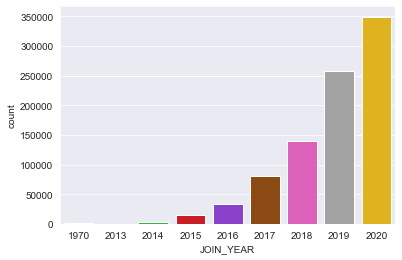

In [101]:
# 가입연도별 신규 가입자수 규모 시각화
sns.countplot(data=df_v1_1, x="JOIN_YEAR")

> => 연도별 신규 가입자수가 지속적으로 상승하는 추세인 것을 확인함

### 3) D_TYPE

In [102]:
# 고유한 값 확인 => 3가지 타입 존재함 확인
df_v1_1["D_TYPE"].unique()

array(['AA', 'BB', 'CC'], dtype=object)

<AxesSubplot:xlabel='D_TYPE', ylabel='count'>

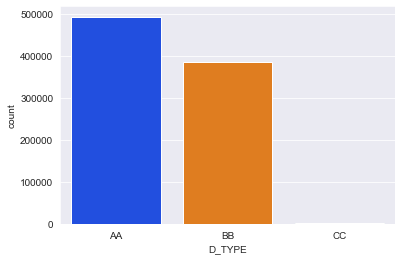

In [103]:
sns.countplot(data=df_v1_1, x="D_TYPE")

In [104]:
df_v1_1["D_TYPE"].value_counts()

AA    493166
BB    384541
CC      1564
Name: D_TYPE, dtype: int64

> => "AA"와 "BB" 건이 대부분이며, "CC" 건은 전체 대비 매우 적은 규모인 것을 확인함

In [160]:
# "USER_ID"별로 "D_TYPE"의 개수 체크해보기 => 두 Feature간 1대1로 매핑되어 있음을 확인
count_dtype = 0
for v in df_v1_1.groupby("USER_ID"):
    id_v, info_v = v
    v1 = info_v["D_TYPE"]
    if len(v1.unique()) != 1:
        print(f"{id_v} => {v1.unique()}")
        count_dtype += 1

print(f"'D_TYPE'이 1개가 아닌 'USER_ID'의 개수 => 총 {count_dtype}개 확인 완료!")

'D_TYPE'이 1개가 아닌 'USER_ID'의 개수 => 총 0개 확인 완료!


> => "AA", "BB", "CC"가 어떤 의미인지는 명확하지 않으나, 특정 기준으로 USER들을 분류해놓은 USER그룹이라는 점 판단 가능

### 4) STORE_ID

In [105]:
# 고유한 STORE_ID 개수 확인 => 총 1061개 존재함 확인
len(df_v1_1["STORE_ID"].unique())

1061

### 5) GOODS_TYPE

In [106]:
# GOODS_TYPE 내역 확인 => A, B, C, D 총 4개의 타입이 존재함 확인
np.sort(df_v1_1["GOODS_TYPE"].unique())

array(['A', 'B', 'C', 'D'], dtype=object)

<AxesSubplot:xlabel='GOODS_TYPE', ylabel='count'>

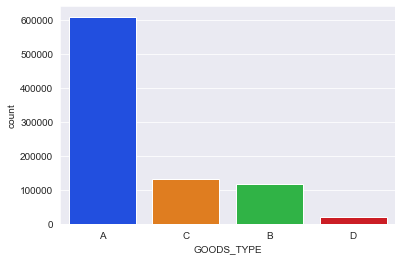

In [107]:
sns.countplot(data=df_v1_1, x="GOODS_TYPE")

In [108]:
df_v1_1["GOODS_TYPE"].value_counts()

A    609790
C    131163
B    118541
D     19777
Name: GOODS_TYPE, dtype: int64

> => A가 가장 큰 비중을 차지하며, C와 B는 상대적으로 비슷한 수준이고 D가 가장 작은 비중을 차지함 확인

### 6) DATE(결제일)

In [109]:
# 날짜 최소값 확인
df_v1_1["DATE"].min()

Timestamp('2020-01-01 00:00:00')

In [110]:
# 날짜 최대값 확인
df_v1_1["DATE"].max()

Timestamp('2020-12-31 00:00:00')

> => 2020년 1월 1일 ~ 2020년 12월 31일 결제된 data 내역임을 확인함

#### 결제월별 분포 시각화

In [111]:
# 결제월 정보 Column 추가한 데이터프레임 생성 => "df_v1_2"
df_v1_2 = df_v1_1.copy()
df_v1_2["DATE_YM"] = df_v1_2["DATE"].dt.strftime("%Y%m")
#df_v1_2["DATE_YM"] = df_v1_2["DATE_YM"].astype(int)
df_v1_2  # 결제월("DATE_YM") 입력된 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001
...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012


<AxesSubplot:xlabel='DATE_YM', ylabel='count'>

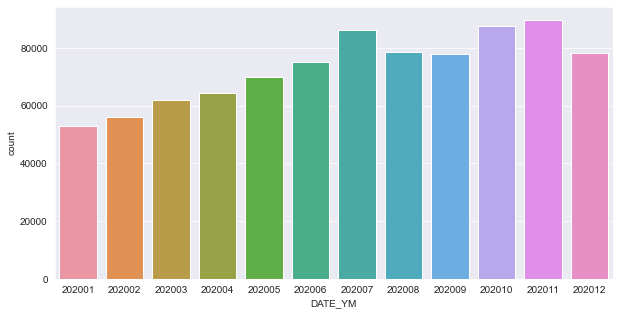

In [112]:
# 2020년 월별 결제건수 분포 추이 확인 => 대체적으로 하반기로 갈수록 증가하는 경향 확인
plt.figure(figsize=(10,5))
sns.countplot(data=df_v1_2, x="DATE_YM")

### 7) COUNT(결제건수)

In [113]:
# 결제건수 현황 확인 => 다양한 유형의 결제건수 존재함 확인
np.sort(df_v1_2["COUNT"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 55, 58, 59, 61], dtype=int64)

<AxesSubplot:xlabel='COUNT', ylabel='count'>

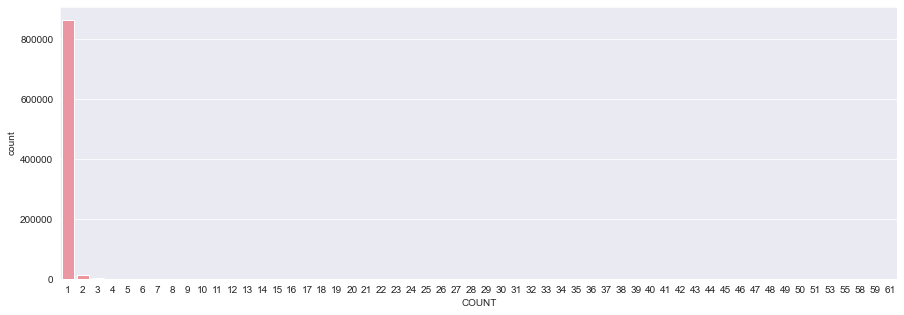

In [114]:
# 결제건수별 분포 시각화
plt.figure(figsize=(15,5))
sns.countplot(data=df_v1_2, x="COUNT")

In [115]:
df_v1_2["COUNT"].value_counts()

1     863775
2      13519
3       1061
4        271
5        136
6         66
7         45
9         25
12        21
16        21
8         20
13        19
14        19
15        19
28        17
10        16
11        15
23        15
17        15
21        14
25        14
18        14
19        13
26         9
22         9
32         9
34         7
27         7
24         7
31         7
30         7
29         6
20         6
36         5
40         4
46         3
37         3
38         3
39         3
49         3
35         3
43         2
47         2
42         2
50         2
33         2
59         1
41         1
53         1
58         1
45         1
61         1
55         1
48         1
51         1
44         1
Name: COUNT, dtype: int64

> => 결제건수가 1건인 유형이 절대적으로 많긴 하지만, 다양한 유형의 결제건수가 함께 존재함을 확인함

### 8) AD1

In [116]:
# 고유한 값 확인 => 다양한 유형이 존재함 확인
df_v1_2["AD1"].unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'DY', 'WH',
       'GR', 'X', 'CVB', 'ADS', 'VO'], dtype=object)

<AxesSubplot:xlabel='AD1', ylabel='count'>

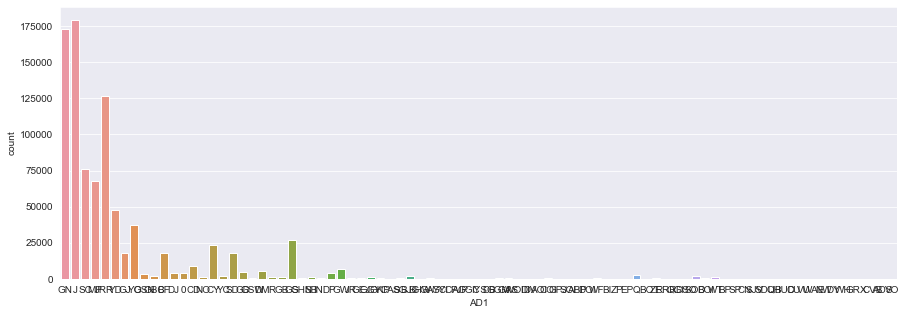

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_v1_2, x="AD1")

> => 해당 Column 정보에 대한 의미는 명확하지 않으나, 특정 유형(10개 내외)에 많은 data가 몰려있는 것이 확인됨

# 주요 Feature별 분석(안)

## 요일별 이용량에 대한 분석

### 전체 data 기준, 요일별 이용량 추이

#### 요일 정보 Column 추가한 데이터프레임 생성 => "df_v2"

In [119]:
# "DATE(결제일)" 기준 요일 정보 추출 후 "DATE_WDAY" Column에 해당 정보 저장
df_v2 = df_v1_2.copy()
df_v2["DATE_WDAY"] = df_v2["DATE"].dt.strftime("%a")
df_v2  # 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,Wed
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,Wed
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,Wed
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,Wed
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,Wed
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,Thu
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,Thu
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,Thu
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,Thu


<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

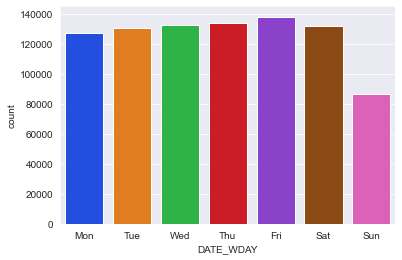

In [120]:
# 요일별 data건수 분포 시각화
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])  # 요일 순서 지정

> => 월요일부터 금요일까지는 점차 이용량이 증가하는 추세이며, 토요일에 소폭 감소 후 일요일에는 현저히 적은 이용량을 나타냄

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => "D_TYPE" 기준 분류

<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

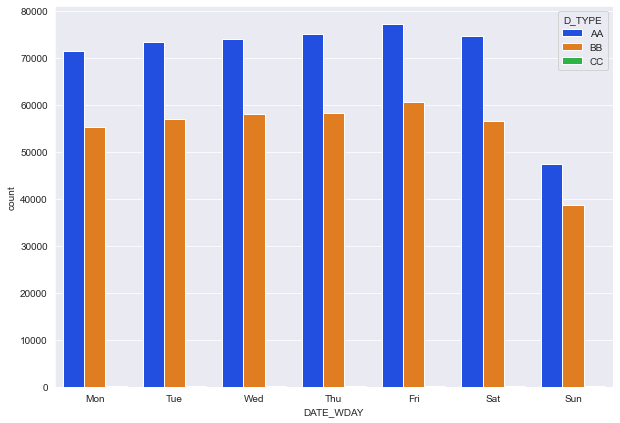

In [121]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
              hue="D_TYPE", hue_order=["AA", "BB", "CC"])

> => 대다수의 비중을 차지하고 있는 A와 B를 기준으로 비교했을 때, 두 그룹간 의미있는 차이는 관찰되지 않음

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => "GOODS_TYPE" 기준 분류

<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

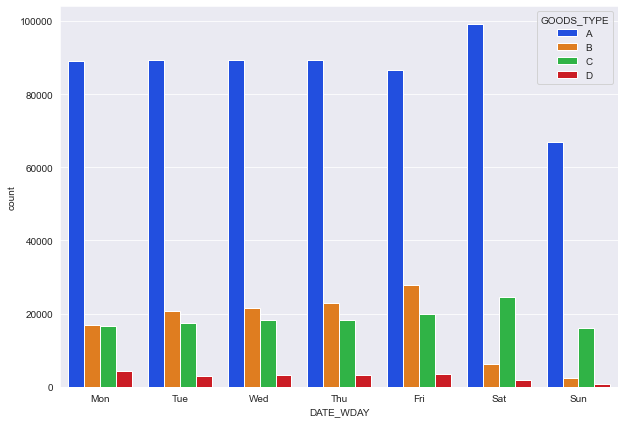

In [122]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
              hue="GOODS_TYPE", hue_order=["A", "B", "C", "D"])

> => 금요일과 토요일을 중심으로 A와 B TYPE간 서로 다른 이용행태가 나타남을 확인 가능

> => A TYPE의 경우, 금요일에는 이용량이 소폭 감소하고 토요일에 이용량이 상당히 증가하는 추세를 보임<br/> => 반면 B TYPE의 경우, 금요일까지 꾸준히 이용량이 상승한 후 토요일에 큰 폭으로 감소하는 추세를 보임

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => 월별 기준 분류

#### "DATE_M", "DATE_D" Column 추가한 데이터프레임 생성 => "df_v2_1"

In [194]:
df_v2_1 = df_v2.copy()
df_v2_1["DATE_M"] = df_v2["DATE"].dt.strftime("%m").astype(int)
df_v2_1["DATE_D"] = df_v2["DATE"].dt.strftime("%d").astype(int)
df_v2_1

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY,DATE_M,DATE_D
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,Wed,1,1
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,Wed,1,1
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,Wed,1,1
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,Wed,1,1
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,Wed,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,Thu,12,31
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,Thu,12,31
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,Thu,12,31
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,Thu,12,31


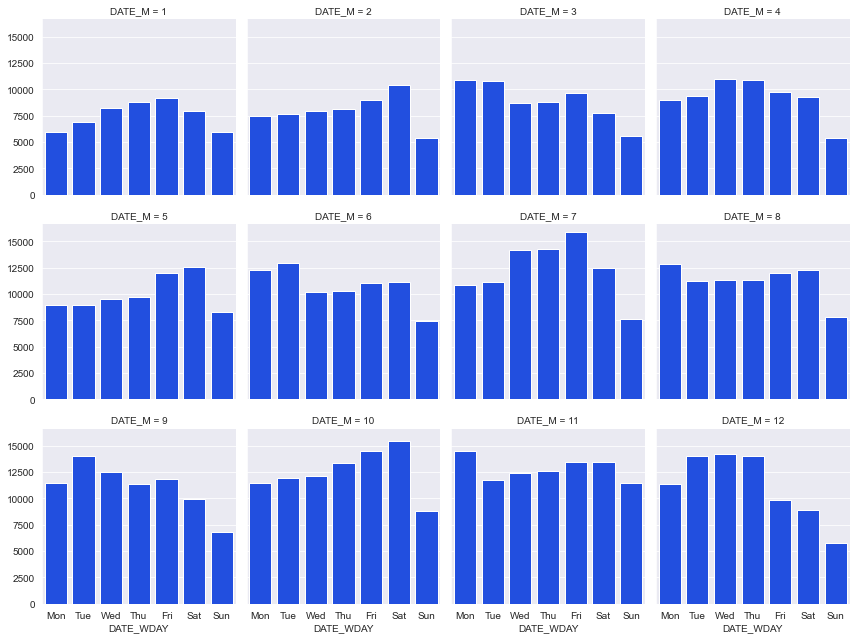

In [124]:
g = sns.FacetGrid(df_v2_1, col="DATE_M", col_wrap=4)  # 한 줄에 4개씩 출력하도록 설정
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

> => 월별로 이용행태가 서로 다르게 나타난다는 것을 확인 가능

> => 특히 눈에 띄는 특징을 살펴보자면,

> => 토요일 이용량이 유독 많은 달 : 2월, 5월, 10월

> => 주 초반(월, 화) 이용량이 유독 많은 달 : 3월, 6월, 9월

> => 금요일 이용량이 유독 많은 달 : 7월

> => 평일 중 금요일 이용량이 유독 적은 달 : 12월

### 월별/요일별 특성에 영향을 미치는 "GOODS_TYPE" 파악

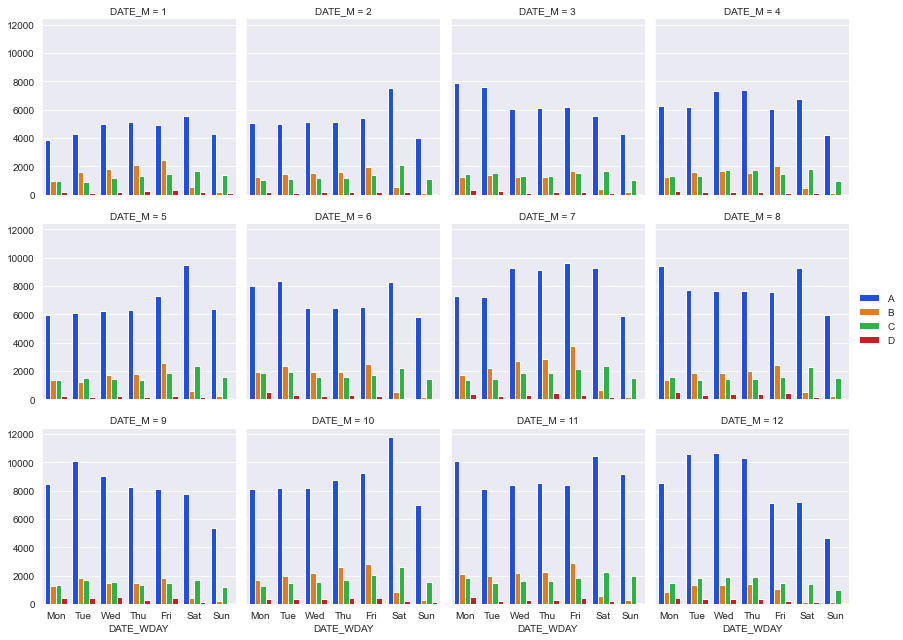

In [125]:
g = sns.FacetGrid(df_v2_1, col="DATE_M", col_wrap=4)  # 한 줄에 4개씩 출력하도록 설정
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
      hue=df_v2_1["GOODS_TYPE"], hue_order=["A", "B", "C", "D"], palette="bright")
g.add_legend()

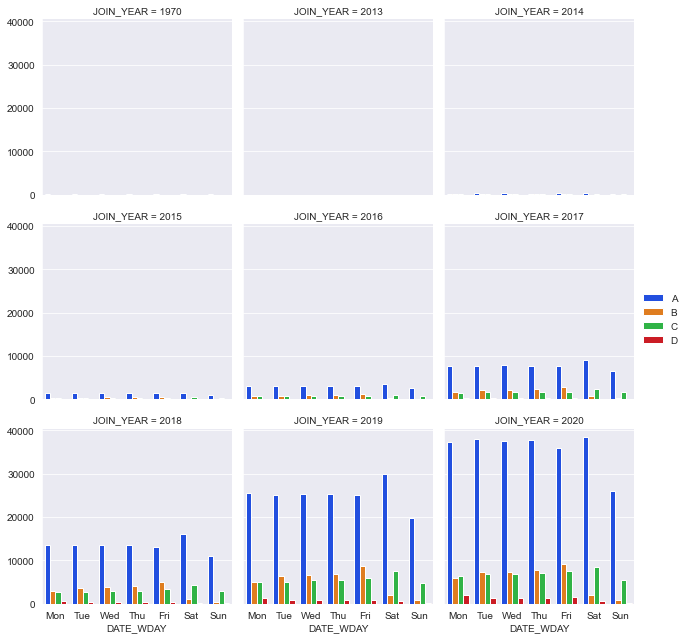

In [126]:
g = sns.FacetGrid(df_v2_1, col="JOIN_YEAR", col_wrap=3)  # 한 줄에 3개씩 출력하도록 설정
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
      hue=df_v2_1["GOODS_TYPE"], hue_order=["A", "B", "C", "D"], palette="bright")
g.add_legend()

# 유저별 한달간 이용건수 예측(1차) - 요일, 날짜, GOODS_TYPE 기준
* 주어진 조건 및 가이드
  - 초기 랜던 시드 설정 => np.random.seed(42)
  - 데이터 구성 가이드<br/>
    o Training Data => 2020.01.01 ~ 2020.09.30<br/>
    o Test Data => 2020.10.01 ~ 2020.12.31

In [227]:
np.random.seed(42)  # 랜덤 시드값 설정

In [213]:
# 위 가이드 기준 Training, Test 데이터 분류
training_v1 = df_v2_1.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
test_v1 = df_v2_1.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

In [214]:
# 요일 정보를 숫자로 변경
training_v1["DATE_WDAY"].replace({"Mon":1, "Tue":2, "Wed":3, "Thu":4, "Fri":5, "Sat":6, "Sun":7}, inplace=True)
test_v1["DATE_WDAY"].replace({"Mon":1, "Tue":2, "Wed":3, "Thu":4, "Fri":5, "Sat":6, "Sun":7}, inplace=True)

# GOODS_TYPE 정보를 숫자로 변경
training_v1["GOODS_TYPE"].replace({"A":1, "B":2, "C":3, "D":4}, inplace=True)
test_v1["GOODS_TYPE"].replace({"A":1, "B":2, "C":3, "D":4}, inplace=True)

c:\users\hj\.conda\envs\pydata\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [215]:
# Training, Test 데이터 준비
x_train = training_v1[["USER_ID", "DATE_WDAY", "DATE_D", "GOODS_TYPE"]]
x_test = test_v1[["USER_ID", "DATE_WDAY", "DATE_D", "GOODS_TYPE"]]
y_train = training_v1[["COUNT"]]
y_test = test_v1[["COUNT"]]

In [216]:
# 랜던포레스트 모델 선언
RF = RandomForestRegressor()

# 랜던포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

MSE = mean_squared_error(y_test, predicted)

print(f"MSE : {MSE}")

C:\Users\HJ\AppData\Local\Temp/ipykernel_12856/3804365796.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


MSE : 0.18809414282616818
